In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

In [132]:
df = pd.read_csv('historical_data.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [133]:
df.shape

(197428, 16)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [135]:
# changing data type to datetime

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

In [137]:
# creating the target column

t_delta = []

for i in range(len(df)):
    t1 = df['created_at'][i]
    t2 = df['actual_delivery_time'][i]
    dif = pd.Timedelta(t2 - t1).seconds
    t_delta.append(dif)

In [138]:
df['actual_time_taken'] = t_delta

In [139]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_time_taken
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


In [140]:
# check for duplicate rows

df.duplicated().sum()

0

In [141]:
df.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_time_taken
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000,197421.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935,2862.304816
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902,1180.916229
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,101.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000,2104.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000,2660.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000,3381.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,73282.000000


In [142]:
# max of total_items is 411
# min of 'subtotal' is zero
# min of 'min_item_price' is -ve
# min of 'max_item_price' is zero
# min of 'total_onshift_dashers','total_busy_dashers' and 'total_outstanding_orders' is -ve
# min of 'estimated_order_place_duration' and 'estimated_store_to_consumer_driving_duration' is zero
# outliers in 'actual_time_taken' as max is 73282 seconds i.e. 20+ hours

## EDA

In [143]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_time_taken
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


<AxesSubplot:xlabel='market_id', ylabel='count'>

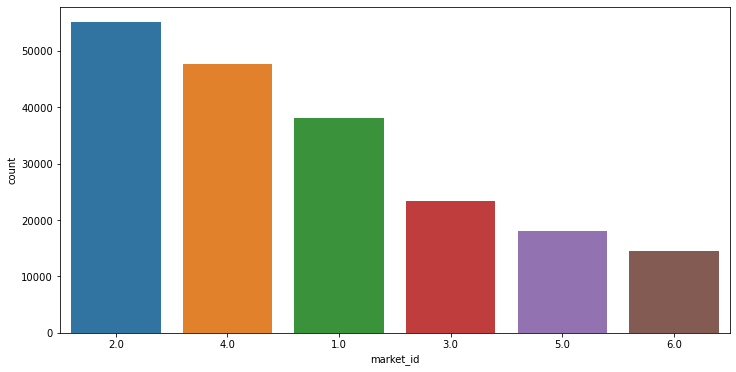

In [144]:
plt.figure(figsize=(12,6))
sns.countplot(df['market_id'], order=df['market_id'].value_counts().index)

Total no. of unique stores: 6743


<AxesSubplot:title={'center':'Top 5 store_id'}, xlabel='store_id', ylabel='count'>

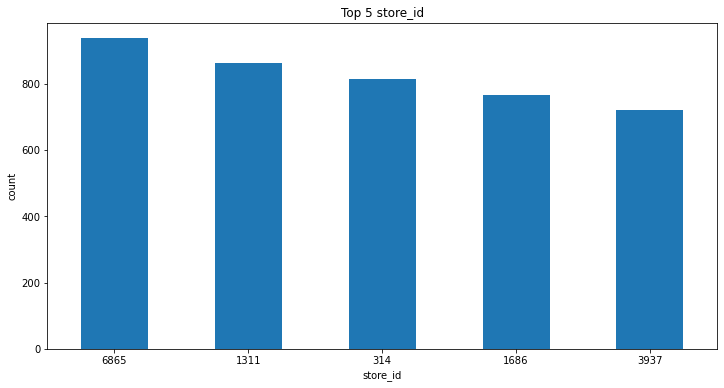

In [145]:
print('Total no. of unique stores:', df['store_id'].nunique())
plt.figure(figsize=(12,6))
df['store_id'].value_counts().head().plot(kind='bar', rot=0, xlabel='store_id', ylabel='count', title='Top 5 store_id')

<AxesSubplot:xlabel='order_protocol', ylabel='count'>

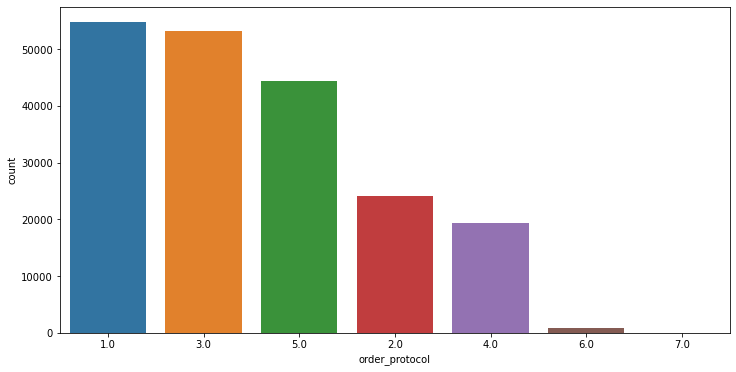

In [146]:
plt.figure(figsize=(12,6))
sns.countplot(df['order_protocol'], order=df['order_protocol'].value_counts().index)

<AxesSubplot:title={'center':'Top 5 total_items'}, xlabel='total_items', ylabel='count'>

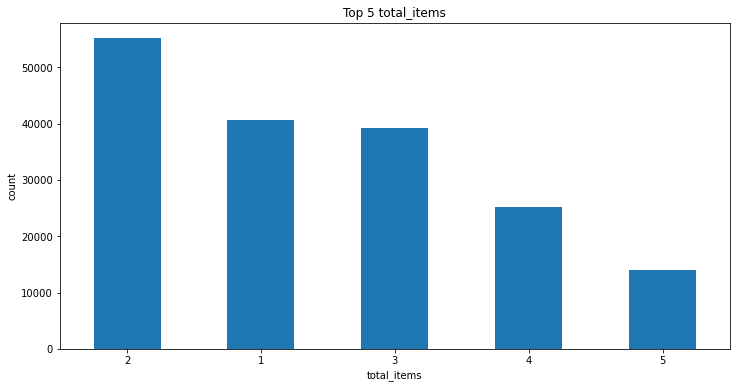

In [147]:
plt.figure(figsize=(12,6))
df['total_items'].value_counts().head().plot(kind='bar', rot=0, xlabel='total_items', ylabel='count', title='Top 5 total_items')

In [148]:
df['store_primary_category'].value_counts()
df['store_primary_category'].nunique()
df.head(15)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_time_taken
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0,2300.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0,1584.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0,1965.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,1586.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,5477,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0,446,715.0,3192.0


#### will drop 'store_primary_category' as this should be unique to all store_id's, but as you can see above 'store_id' 5477 has mexican, indian and null values at the same time

<AxesSubplot:xlabel='subtotal', ylabel='Density'>

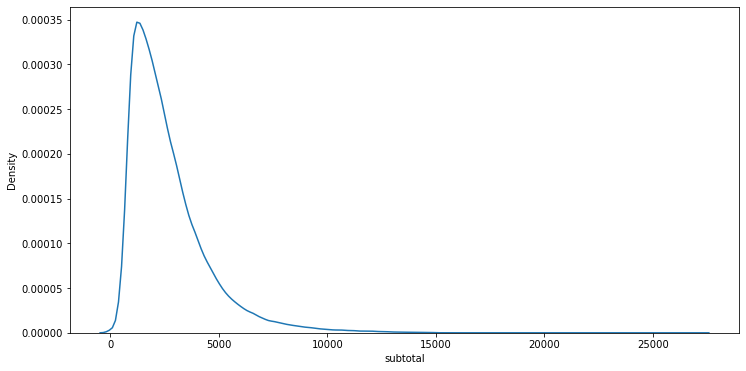

In [149]:
plt.figure(figsize=(12,6))
sns.kdeplot(df['subtotal'])

<AxesSubplot:xlabel='num_distinct_items', ylabel='count'>

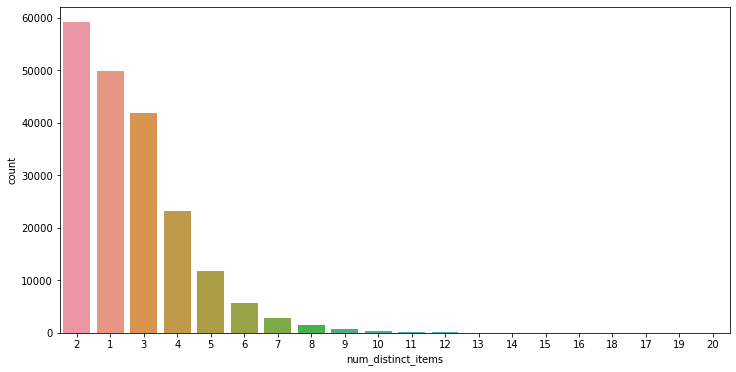

In [150]:
plt.figure(figsize=(12,6))
sns.countplot(df['num_distinct_items'], order=df['num_distinct_items'].value_counts().index)

<AxesSubplot:xlabel='total_items', ylabel='actual_time_taken'>

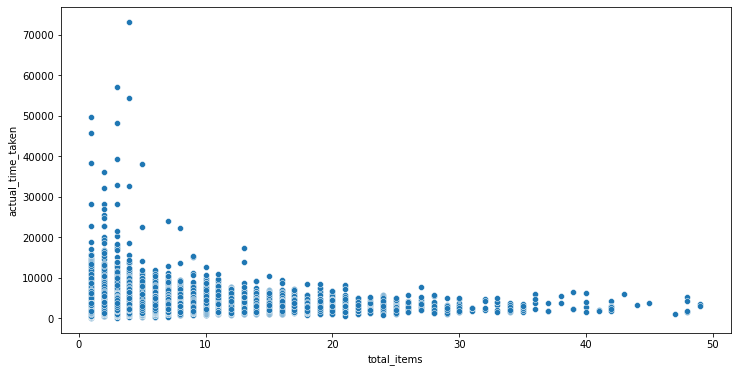

In [151]:
# 'actual_time_taken' vs 'total_items'

plt.subplots(figsize = (12, 6))
sns.scatterplot(x=df[df['total_items'] < 50]['total_items'], y=df['actual_time_taken']) # filtering outliers in total_items

<AxesSubplot:xlabel='subtotal', ylabel='actual_time_taken'>

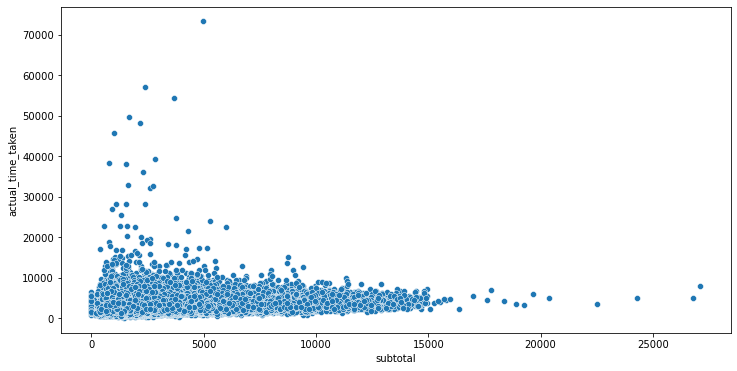

In [152]:
# 'actual_time_taken' vs 'subtotal'

plt.subplots(figsize = (12, 6))
sns.scatterplot(x=df['subtotal'], y=df['actual_time_taken'])

<AxesSubplot:xlabel='total_onshift_dashers', ylabel='actual_time_taken'>

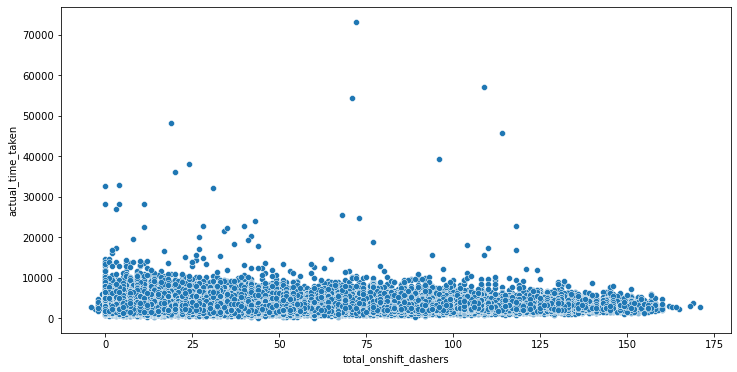

In [153]:
# 'actual_time_taken' vs 'total_onshift_dashers'

plt.subplots(figsize = (12, 6))
sns.scatterplot(x=df['total_onshift_dashers'], y=df['actual_time_taken'])

<AxesSubplot:xlabel='total_outstanding_orders', ylabel='actual_time_taken'>

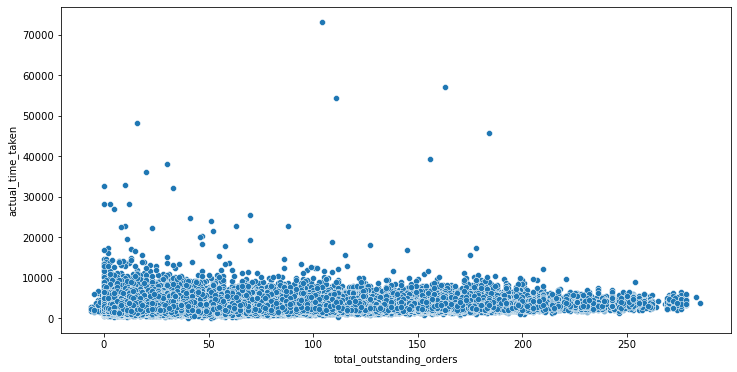

In [154]:
# 'actual_time_taken' vs 'total_outstanding_orders'

plt.subplots(figsize = (12, 6))
sns.scatterplot(x=df['total_outstanding_orders'], y=df['actual_time_taken'])

In [155]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_time_taken
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


In [156]:
d2 = df['store_id'].value_counts().to_dict()

In [157]:
encoded_values = []

for i in range(len(df)):
    encoded_values.append(d2[df['store_id'][i]])

In [158]:
df['store_id_encoded'] = encoded_values

In [159]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_time_taken,store_id_encoded
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,13
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,13
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,13
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,13


In [160]:
#df['order_protocol'].value_counts()

df['total_items'].value_counts()
# removing the one occurence where 'total_items' = 411 as 'min_item_price' is also zero
ind = df[df['total_items'] == 411].index
df.drop(ind, inplace=True)

In [161]:
#df['subtotal'].value_counts().plot(kind='kde')
# removing rows were subtotal is zero
indx = df[df['subtotal'] == 0].index
df.drop(indx, inplace=True)

df['num_distinct_items'].value_counts()
# checking if condition 'total_items' >= 'num_distinct_items' is true or not
df[df['num_distinct_items'] > df['total_items']] # pass

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_time_taken,store_id_encoded


In [162]:
# min_item_price can't be negative
# min_item_price can be zero if there is a freebie involved in the order
# max_item_price can't be zero period
# min_item_price can't be greater than max_item_price, they can be equal

In [163]:
indx = df[df['min_item_price'] < 0].index 
df.drop(indx, inplace=True)

In [164]:
indx = df[df['max_item_price'] == 0].index
df.drop(indx, inplace=True)

In [165]:
indx = df[df['min_item_price'] > df['max_item_price']].index
df.drop(indx, inplace=True)

In [166]:
# min of 'total_onshift_dashers','total_busy_dashers' and 'total_outstanding_orders' can't be -ve

ind1 = df[df['total_onshift_dashers'] < 0].index
df.drop(ind1, inplace=True)

ind2 = df[df['total_busy_dashers'] < 0].index
df.drop(ind2, inplace=True)

ind3 = df[df['total_outstanding_orders'] < 0].index
df.drop(ind3, inplace=True)

In [167]:
# 'total_busy_dashers' should always be less than equal to 'total_onshift_dashers'

indx = df[df['total_busy_dashers'] > df['total_onshift_dashers']].index # 40k invalid rows, dropping all
df.drop(indx, inplace=True)

In [168]:
# 'estimated_store_to_consumer_driving_duration' can't be zero

indx = df[df['estimated_store_to_consumer_driving_duration'] == 0].index
df.drop(indx, inplace=True)

In [169]:
indx = df[df['actual_time_taken'].isna()].index # dropping null values from target col
df.drop(indx, inplace=True)

In [170]:
# dropping 'created_at' and 'actual_delivery_time' since we don't need them anymore, 'store_id' also since already encoded

df.drop(['created_at','actual_delivery_time','store_id','store_primary_category'], axis=1, inplace=True)

In [171]:
# df2 = df['store_primary_category'].value_counts(normalize=True)*100
# l1 = df2[df2 < 0.1].index
# df['store_primary_category'].replace(l1, 'Others', inplace=True)

In [172]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_time_taken,store_id_encoded
count,155496.000000,155493.000000,156277.000000,156277.000000,156277.000000,156277.000000,156277.000000,140108.000000,140108.000000,140108.000000,156277.000000,155825.000000,156277.00000,156277.000000
mean,3.097867,2.867164,3.213928,2695.417509,2.688201,681.996922,1157.878677,45.975348,39.742784,57.997673,309.037913,545.038158,2840.74487,133.820146
std,1.558396,1.498821,2.518358,1837.003005,1.641330,518.893407,557.493548,36.074602,31.678657,54.318823,90.443277,219.923226,1169.88357,161.106753
min,1.000000,1.000000,1.000000,95.000000,1.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,2.000000,297.00000,1.000000
25%,2.000000,1.000000,2.000000,1400.000000,2.000000,299.000000,800.000000,17.000000,13.000000,15.000000,251.000000,381.000000,2096.00000,30.000000
50%,3.000000,3.000000,3.000000,2207.000000,2.000000,595.000000,1095.000000,37.000000,32.000000,39.000000,251.000000,542.000000,2644.00000,75.000000
75%,4.000000,4.000000,4.000000,3400.000000,3.000000,942.000000,1395.000000,68.000000,60.000000,87.000000,446.000000,702.000000,3353.00000,168.000000
max,6.000000,7.000000,84.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,148.000000,285.000000,2715.000000,1711.000000,73282.00000,937.000000


<AxesSubplot:xlabel='actual_time_taken'>

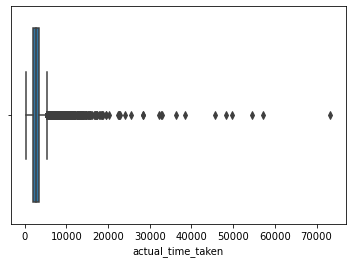

In [173]:
# Outliers

sns.boxplot(df['actual_time_taken'])

<AxesSubplot:xlabel='actual_time_taken', ylabel='Density'>

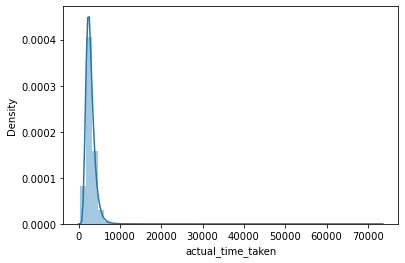

In [174]:
sns.distplot(df['actual_time_taken'])

In [175]:
# calculating upper whisker value of 'actual_time_taken'

df['actual_time_taken'].quantile(.75) + 1.5*(df['actual_time_taken'].quantile(.75) - df['actual_time_taken'].quantile(.25))

5238.5

In [176]:
# rounding this upper limit to 5400 seconds (1.5 hrs)

print(df[df['actual_time_taken'] > 5400].shape)
df[df['actual_time_taken'] > 5400].shape[0]/df.shape[0]*100

(4132, 14)


2.644023112806107

In [177]:
# trimming approach

indx = df[df['actual_time_taken'] > 5400].index
df.drop(indx, inplace=True)

In [178]:
# # capping approach

# upper_limit = 5400
# df.loc[df['actual_time_taken'] > upper_limit, ['actual_time_taken']] = upper_limit

In [179]:
df[df['actual_time_taken'] > 5400]

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_time_taken,store_id_encoded


In [180]:
df.shape

(152145, 14)

In [181]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_time_taken,store_id_encoded
count,151387.000000,151377.000000,152145.000000,152145.000000,152145.000000,152145.000000,152145.000000,136474.000000,136474.000000,136474.000000,152145.000000,151700.000000,152145.000000,152145.000000
mean,3.104553,2.870443,3.198423,2676.064945,2.676013,681.464471,1154.370837,46.137037,39.827205,57.874416,308.407158,543.082162,2736.186572,134.421033
std,1.553700,1.497693,2.497965,1812.441093,1.625994,517.446592,554.313517,36.043820,31.631609,54.090561,89.932266,219.510211,889.039092,161.517263
min,1.000000,1.000000,1.000000,95.000000,1.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,3.000000,297.000000,1.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,799.000000,17.000000,13.000000,15.000000,251.000000,379.000000,2081.000000,30.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,32.000000,39.000000,251.000000,540.000000,2614.000000,76.000000
75%,4.000000,4.000000,4.000000,3390.000000,3.000000,942.000000,1395.000000,68.000000,61.000000,87.000000,446.000000,700.000000,3277.000000,171.000000
max,6.000000,7.000000,84.000000,24300.000000,20.000000,14700.000000,14700.000000,171.000000,148.000000,285.000000,1740.000000,1711.000000,5400.000000,937.000000


In [182]:
# max of 'estimated_order_place_duration' 1740 seconds also seems high
# upper whisker value

df['estimated_order_place_duration'].quantile(.75) + 1.5*(df['estimated_order_place_duration'].quantile(.75) - df['estimated_order_place_duration'].quantile(.25))

738.5

In [183]:
df[df['estimated_order_place_duration'] > 740].shape

(21, 14)

In [184]:
# rounding it to 740 and dropping

indx = df[df['estimated_order_place_duration'] > 740].index
df.drop(indx, inplace=True)

In [185]:
df.shape

(152124, 14)

In [186]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_time_taken,store_id_encoded
count,151366.000000,151356.000000,152124.000000,152124.000000,152124.000000,152124.000000,152124.000000,136453.000000,136453.000000,136453.000000,152124.000000,151679.000000,152124.000000,152124.000000
mean,3.104535,2.870431,3.198450,2675.995070,2.676001,681.451993,1154.342727,46.133775,39.823448,57.866144,308.282454,543.089406,2736.079442,134.412322
std,1.553760,1.497693,2.498084,1812.461278,1.626041,517.455628,554.313366,36.043763,31.630518,54.087081,89.223730,219.505364,888.995305,161.512002
min,1.000000,1.000000,1.000000,95.000000,1.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,3.000000,297.000000,1.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,799.000000,17.000000,13.000000,15.000000,251.000000,379.000000,2081.000000,30.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,32.000000,39.000000,251.000000,540.000000,2614.000000,76.000000
75%,4.000000,4.000000,4.000000,3390.000000,3.000000,942.000000,1395.000000,68.000000,61.000000,87.000000,446.000000,700.000000,3277.000000,171.000000
max,6.000000,7.000000,84.000000,24300.000000,20.000000,14700.000000,14700.000000,171.000000,148.000000,285.000000,732.000000,1711.000000,5400.000000,937.000000


In [187]:
# min value of 'estimated_store_to_consumer_driving_duration' is too low
# min time of travel should be around 5 minutes (300 seconds)

df[df['estimated_store_to_consumer_driving_duration'] < 300].shape

(22754, 14)

In [188]:
# 22754 is a lot of rows, trying both trimming and capping

# indx = df[df['estimated_store_to_consumer_driving_duration'] < 300].index
# df.drop(indx, inplace=True)

In [189]:
# capping approach

lower_limit = 300
df.loc[df['estimated_store_to_consumer_driving_duration'] < lower_limit, ['estimated_store_to_consumer_driving_duration']] = lower_limit

In [190]:
df.shape

(152124, 14)

In [191]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_time_taken,store_id_encoded
count,151366.000000,151356.000000,152124.000000,152124.000000,152124.000000,152124.000000,152124.000000,136453.000000,136453.000000,136453.000000,152124.000000,151679.000000,152124.000000,152124.000000
mean,3.104535,2.870431,3.198450,2675.995070,2.676001,681.451993,1154.342727,46.133775,39.823448,57.866144,308.282454,556.096177,2736.079442,134.412322
std,1.553760,1.497693,2.498084,1812.461278,1.626041,517.455628,554.313366,36.043763,31.630518,54.087081,89.223730,200.020243,888.995305,161.512002
min,1.000000,1.000000,1.000000,95.000000,1.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,300.000000,297.000000,1.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,799.000000,17.000000,13.000000,15.000000,251.000000,379.000000,2081.000000,30.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,32.000000,39.000000,251.000000,540.000000,2614.000000,76.000000
75%,4.000000,4.000000,4.000000,3390.000000,3.000000,942.000000,1395.000000,68.000000,61.000000,87.000000,446.000000,700.000000,3277.000000,171.000000
max,6.000000,7.000000,84.000000,24300.000000,20.000000,14700.000000,14700.000000,171.000000,148.000000,285.000000,732.000000,1711.000000,5400.000000,937.000000


In [192]:
# time-diff feature creation

df['pred_total_time'] = df['estimated_order_place_duration'] + df['estimated_store_to_consumer_driving_duration']
df['time_diff'] = df['actual_time_taken'] - df['pred_total_time']

In [193]:
# total_available_dashers feature creation

df['total_available_dashers'] = df['total_onshift_dashers'] - df['total_busy_dashers']

In [194]:
df.head()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_time_taken,store_id_encoded,pred_total_time,time_diff,total_available_dashers
0,1.0,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1,1307.0,2472.0,19.0
2,3.0,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,13,1136.0,645.0,1.0
3,3.0,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,300.0,3075.0,13,746.0,2329.0,0.0
4,3.0,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,13,1096.0,1294.0,0.0
5,3.0,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0,2300.0,13,784.0,1516.0,0.0


In [195]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_time_taken,store_id_encoded,pred_total_time,time_diff,total_available_dashers
count,151366.000000,151356.000000,152124.000000,152124.000000,152124.000000,152124.000000,152124.000000,136453.000000,136453.000000,136453.000000,152124.000000,151679.000000,152124.000000,152124.000000,151679.000000,151679.000000,136453.000000
mean,3.104535,2.870431,3.198450,2675.995070,2.676001,681.451993,1154.342727,46.133775,39.823448,57.866144,308.282454,556.096177,2736.079442,134.412322,864.392414,1872.066878,6.310327
std,1.553760,1.497693,2.498084,1812.461278,1.626041,517.455628,554.313366,36.043763,31.630518,54.087081,89.223730,200.020243,888.995305,161.512002,216.560496,856.217180,9.472998
min,1.000000,1.000000,1.000000,95.000000,1.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,300.000000,297.000000,1.000000,300.000000,-636.000000,0.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,799.000000,17.000000,13.000000,15.000000,251.000000,379.000000,2081.000000,30.000000,705.000000,1237.000000,1.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,32.000000,39.000000,251.000000,540.000000,2614.000000,76.000000,847.000000,1744.000000,3.000000
75%,4.000000,4.000000,4.000000,3390.000000,3.000000,942.000000,1395.000000,68.000000,61.000000,87.000000,446.000000,700.000000,3277.000000,171.000000,1014.000000,2385.000000,8.000000
max,6.000000,7.000000,84.000000,24300.000000,20.000000,14700.000000,14700.000000,171.000000,148.000000,285.000000,732.000000,1711.000000,5400.000000,937.000000,1962.000000,4835.000000,86.000000


In [196]:
df[df['time_diff'] > 900].shape

(135157, 17)

In [197]:
# null values

print(df.isnull().sum())
df.isnull().mean()*100

market_id                                         758
order_protocol                                    768
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           15671
total_busy_dashers                              15671
total_outstanding_orders                        15671
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      445
actual_time_taken                                   0
store_id_encoded                                    0
pred_total_time                                   445
time_diff                                         445
total_available_dashers                         15671
dtype: int64


market_id                                        0.498278
order_protocol                                   0.504851
total_items                                      0.000000
subtotal                                         0.000000
num_distinct_items                               0.000000
min_item_price                                   0.000000
max_item_price                                   0.000000
total_onshift_dashers                           10.301465
total_busy_dashers                              10.301465
total_outstanding_orders                        10.301465
estimated_order_place_duration                   0.000000
estimated_store_to_consumer_driving_duration     0.292525
actual_time_taken                                0.000000
store_id_encoded                                 0.000000
pred_total_time                                  0.292525
time_diff                                        0.292525
total_available_dashers                         10.301465
dtype: float64

In [198]:
# train-test-split

x = df.drop('actual_time_taken', axis=1)
y = df['actual_time_taken']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=56)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
x_train.head()

(106486, 16)
(45638, 16)
(106486,)
(45638,)


,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,store_id_encoded,pred_total_time,time_diff,total_available_dashers
64964,1.0,1.0,1,975,1,775,775,35.0,35.0,36.0,446,543.0,16,989.0,1011.0,0.0
139446,5.0,2.0,2,1690,2,695,995,21.0,16.0,22.0,251,530.0,45,781.0,1297.0,5.0
55256,4.0,1.0,3,1400,3,310,595,79.0,79.0,82.0,446,NaN,101,NaN,NaN,0.0
1733,5.0,2.0,3,4585,2,1395,1595,24.0,19.0,24.0,251,328.0,46,579.0,1886.0,5.0
128186,3.0,3.0,1,1250,1,1250,1250,23.0,22.0,18.0,251,650.0,44,901.0,712.0,1.0


In [199]:
# # filling missing values in 'store_primary_category' with simpleimputer since it is a nominal cat varible and knnimputer won't work on it.

# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='most_frequent')
# x_train[['store_primary_category']] = imputer.fit_transform(x_train[['store_primary_category']])
# x_test[['store_primary_category']] = imputer.transform(x_test[['store_primary_category']])

In [200]:
# # nominal encoding 'store_primary_category'

# x_train = pd.get_dummies(x_train, columns=['store_primary_category'], drop_first=True)
# x_test = pd.get_dummies(x_test, columns=['store_primary_category'], drop_first=True)

In [201]:
print(x_train.shape)
x_test.shape

(106486, 16)


(45638, 16)

In [202]:
# filling the rest of null values with KNNimputer

from sklearn.impute import KNNImputer

kimp = KNNImputer()

kimp.fit(x_train)

x_train2 = kimp.transform(x_train)
x_test2 = kimp.transform(x_test)

x_train2 = pd.DataFrame(x_train2, columns=x_train.columns)
x_test2 = pd.DataFrame(x_test2, columns=x_test.columns)

In [203]:
#x_train2.isnull().sum()

In [204]:
#x_test2.isnull().sum()

In [205]:
x_train2.head()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,store_id_encoded,pred_total_time,time_diff,total_available_dashers
0,1.0,1.0,1.0,975.0,1.0,775.0,775.0,35.0,35.0,36.0,446.0,543.0,16.0,989.0,1011.0,0.0
1,5.0,2.0,2.0,1690.0,2.0,695.0,995.0,21.0,16.0,22.0,251.0,530.0,45.0,781.0,1297.0,5.0
2,4.0,1.0,3.0,1400.0,3.0,310.0,595.0,79.0,79.0,82.0,446.0,499.2,101.0,945.2,1083.2,0.0
3,5.0,2.0,3.0,4585.0,2.0,1395.0,1595.0,24.0,19.0,24.0,251.0,328.0,46.0,579.0,1886.0,5.0
4,3.0,3.0,1.0,1250.0,1.0,1250.0,1250.0,23.0,22.0,18.0,251.0,650.0,44.0,901.0,712.0,1.0


In [206]:
# Correlation

# plt.figure(figsize=(50,50))
# sns.heatmap(x_train2.corr(), annot = True)
# plt.show()

In [207]:
# scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train2 = scaler.fit_transform(x_train2)
x_test2 = scaler.transform(x_test2)

x_train2 = pd.DataFrame(x_train2, columns=x_train.columns)
x_test2 = pd.DataFrame(x_test2, columns=x_test.columns)

x_train2.head()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,store_id_encoded,pred_total_time,time_diff,total_available_dashers
0,-1.358596,-1.248325,-0.877097,-0.939008,-1.033560,0.180652,-0.684683,-0.306339,-0.143520,-0.405764,1.540156,-0.065127,-0.733215,0.574309,-1.006683,-0.689852
1,1.221057,-0.579735,-0.477278,-0.543700,-0.416257,0.025996,-0.288653,-0.710930,-0.768737,-0.675134,-0.643233,-0.130090,-0.553331,-0.385038,-0.672404,-0.136970
2,0.576144,-1.248325,-0.077459,-0.704034,0.201047,-0.718283,-1.008708,0.965233,1.304352,0.479308,1.540156,-0.284001,-0.205967,0.372292,-0.922295,-0.689852
3,1.221057,-0.579735,-0.077459,1.056883,-0.416257,1.379231,0.791431,-0.624232,-0.670019,-0.636653,-0.643233,-1.139506,-0.547128,-1.316710,0.016024,-0.136970
4,-0.068769,0.088856,-0.877097,-0.786966,-1.033560,1.098918,0.170383,-0.653131,-0.571300,-0.752097,-0.643233,0.469564,-0.559534,0.168431,-1.356156,-0.579276


In [208]:
# Printing VIF values for all the cols

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = dict()

for i in range(len(x_train2.columns)):
    vif[x_train2.columns[i]] = variance_inflation_factor(x_train2.values, i)
    
vif

{'market_id': 1.0239957002466378,
 'order_protocol': 1.9920276038359863,
 'total_items': 3.217447096937352,
 'subtotal': 3.748182224329314,
 'num_distinct_items': 4.486731922847007,
 'min_item_price': 2.153806310913773,
 'max_item_price': 2.3409531027851136,
 'total_onshift_dashers': inf,
 'total_busy_dashers': inf,
 'total_outstanding_orders': 17.088531705431713,
 'estimated_order_place_duration': 37259.09341809432,
 'estimated_store_to_consumer_driving_duration': 187065.81236575908,
 'store_id_encoded': 1.286987581270521,
 'pred_total_time': 219587.03111985172,
 'time_diff': 1.2404650803227337,
 'total_available_dashers': inf}

In [209]:
# check for multicollinearity

cor = x_train2.corr()

cols = cor.columns

columns_to_drop = []


for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        
        if abs(cor.loc[cols[i], cols[j]]) > 0.9: # dropping columns with more than 0.8 absolute correlation coefficient
            print(cols[i], cols[j])
            
            if vif[cols[i]] > vif[cols[j]]:
                columns_to_drop.append(cols[i])
            else:
                columns_to_drop.append(cols[j])

columns_to_drop = list(set(columns_to_drop))
print(len(columns_to_drop))
columns_to_drop

total_onshift_dashers total_busy_dashers
total_onshift_dashers total_outstanding_orders
total_busy_dashers total_outstanding_orders
estimated_store_to_consumer_driving_duration pred_total_time
3


['total_onshift_dashers', 'pred_total_time', 'total_busy_dashers']

In [210]:
# dropping features

print(x_train2.shape)
print(x_test2.shape)

x_train2.drop(columns_to_drop, axis=1, inplace=True)
x_test2.drop(columns_to_drop, axis=1, inplace=True)

print(x_train2.shape)
print(x_test2.shape)

(106486, 16)
(45638, 16)
(106486, 13)
(45638, 13)


In [211]:
# base model 4 (model 2 + capping 'estimated_store_to_consumer_driving_duration') + (new features)

import xgboost as xg
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=56)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(n_estimators=50, random_state=56, n_jobs=-1)
gb = GradientBoostingRegressor(random_state=56)
xgb = xg.XGBRegressor(objective ='reg:linear', verbosity=0, random_state=56)

models = [lr,dt,knn,rf,gb,xgb]

for m in models:
    m.fit(x_train2, y_train)
    train_pred = m.predict(x_train2)
    test_pred = m.predict(x_test2)
    print(m, ':', np.sqrt(mse(train_pred, y_train)).round(4), np.sqrt(mse(test_pred, y_test)).round(4))

LinearRegression() : 44.3719 47.2633
DecisionTreeRegressor(random_state=56) : 0.0 67.8195
KNeighborsRegressor() : 169.6793 205.6347
RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=56) : 17.7962 50.3442
GradientBoostingRegressor(random_state=56) : 47.6739 51.0396
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...) : 35.9952 

In [212]:
# cross-validation

for m in models:
    scores = cross_val_score(m, pd.concat([x_train2, x_test2]), pd.concat([y_train, y_test]), cv=5, scoring='neg_root_mean_squared_error')
    print(m)
    print(scores)
    print('Mean=', scores.mean())
    print('Std=', scores.std())
    print()

LinearRegression()
[-42.69455842 -44.54142924 -48.1374703  -41.62853388 -48.8513585 ]
Mean= -45.17067006669487
Std= 2.878304105605408

DecisionTreeRegressor(random_state=56)
[-61.38513868 -60.42521009 -67.25425946 -65.31298542 -65.94640137]
Mean= -64.06479900198575
Std= 2.6720120374048495

KNeighborsRegressor()
[-199.31306536 -202.31771617 -204.6588566  -201.26120567 -202.38849044]
Mean= -201.98786684596348
Std= 1.7370138498856178

RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=56)
[-46.36875612 -47.27647991 -51.02287012 -44.77161431 -51.7527399 ]
Mean= -48.23849207149678
Std= 2.703454096603805

GradientBoostingRegressor(random_state=56)
[-46.82055499 -48.38762857 -51.61261362 -45.61567515 -52.45754245]
Mean= -48.97880295463466
Std= 2.6592005263588274

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval

In [213]:
# From above results we can see that cross-validation are similar between LR, RFR and GBR, but RFR is overfitting

In [214]:
# hyper tuning

from sklearn.model_selection import GridSearchCV
m1 = RandomForestRegressor(random_state=56)

params = [{'n_estimators': [10,25,50], 'criterion': ['squared_error', 'friedman_mse', 'poisson'], 'max_depth': [3,5,7,10]}]

gs = GridSearchCV(estimator=m1, param_grid=params, scoring='neg_root_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

#gs.fit(x_train2,y_train)

In [215]:
#gs.best_params_

In [216]:
#gs.best_score_

In [217]:
#gs.cv_results_

In [218]:
rfr = RandomForestRegressor(random_state=56, criterion='poisson', max_depth=10, n_estimators=50)
model = [rfr]

for m in model:
    m.fit(x_train2, y_train)
    train_pred = m.predict(x_train2)
    test_pred = m.predict(x_test2)
    print(m, ':', np.sqrt(mse(train_pred, y_train)).round(4), np.sqrt(mse(test_pred, y_test)).round(4))

RandomForestRegressor(criterion='poisson', max_depth=10, n_estimators=50,
                      random_state=56) : 39.7624 51.1686


In [219]:
r2_score(y_test, test_pred)

0.9966822321729154

In [220]:
#, 'min_samples_split': [2,3,5] , min_samples_split=8

In [221]:
# hyper tuning

from sklearn.model_selection import GridSearchCV
m2 = GradientBoostingRegressor(random_state=56)

params = [{'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [75, 100, 125]}]

gs2 = GridSearchCV(estimator=m2, param_grid=params, scoring='neg_root_mean_squared_error', cv=5)

#gs2.fit(x_train2,y_train)

In [222]:
#gs2.best_params_

In [223]:
#gs.best_score_

In [224]:
gbr = GradientBoostingRegressor(random_state=56, loss='squared_error', learning_rate=0.1, n_estimators=150)
model = [gbr]

for m in model:
    m.fit(x_train2, y_train)
    train_pred = m.predict(x_train2)
    test_pred = m.predict(x_test2)
    print(m, ':', np.sqrt(mse(train_pred, y_train)).round(4), np.sqrt(mse(test_pred, y_test)).round(4))

GradientBoostingRegressor(n_estimators=150, random_state=56) : 46.7981 50.4609


In [225]:
r2_score(y_test, test_pred)

0.9967733788282446

In [226]:
lr = LinearRegression()
model = [lr]

for m in model:
    m.fit(x_train2, y_train)
    train_pred = m.predict(x_train2)
    test_pred = m.predict(x_test2)
    print(m, ':', np.sqrt(mse(train_pred, y_train)).round(4), np.sqrt(mse(test_pred, y_test)).round(4))

LinearRegression() : 44.3719 47.2633


In [227]:
from sklearn.metrics import r2_score

r2_score(y_test, test_pred)

0.997169354269369

In [ ]:
# -----end------

In [196]:
# base model 4 (model 2 + capping 'estimated_store_to_consumer_driving_duration')(good)

import xgboost as xg
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=56)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state=56)
gb = GradientBoostingRegressor(random_state=56)
#xgb = xg.XGBRegressor(objective ='reg:linear', verbosity=0, random_state=56)

models = [lr,dt,knn,rf,gb]

for m in models:
    m.fit(x_train2, y_train)
    train_pred = m.predict(x_train2)
    test_pred = m.predict(x_test2)
    print(m, ':', np.sqrt(mse(train_pred, y_train)).round(4), np.sqrt(mse(test_pred, y_test)).round(4))

LinearRegression() : 805.1047 805.3652
DecisionTreeRegressor(random_state=56) : 35.2726 1108.5247
KNeighborsRegressor() : 687.6537 836.5166
RandomForestRegressor(random_state=56) : 297.5362 787.8525
GradientBoostingRegressor(random_state=56) : 783.2083 786.1595


In [126]:
# base model 4 (model 2 + trimming 'estimated_store_to_consumer_driving_duration')

import xgboost as xg
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=56)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state=56)
gb = GradientBoostingRegressor(random_state=56)
#xgb = xg.XGBRegressor(objective ='reg:linear', verbosity=0, random_state=56)

models = [lr,dt,knn,rf,gb]

for m in models:
    m.fit(x_train2, y_train)
    train_pred = m.predict(x_train2)
    test_pred = m.predict(x_test2)
    print(m, ':', np.sqrt(mse(train_pred, y_train)).round(4), np.sqrt(mse(test_pred, y_test)).round(4))

LinearRegression() : 801.0641 802.2683
DecisionTreeRegressor(random_state=56) : 24.064 1105.8675
KNeighborsRegressor() : 685.0678 840.5153
RandomForestRegressor(random_state=56) : 294.9529 787.8461
GradientBoostingRegressor(random_state=56) : 779.255 785.0916


In [384]:
# base model 3 (outlier with capping)(fail)

import xgboost as xg
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=56)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state=56)
gb = GradientBoostingRegressor(random_state=56)
#xgb = xg.XGBRegressor(objective ='reg:linear', verbosity=0, random_state=56)

models = [lr,dt,knn,rf,gb]

for m in models:
    m.fit(x_train2, y_train)
    train_pred = m.predict(x_train2)
    test_pred = m.predict(x_test2)
    print(m, ':', np.sqrt(mse(train_pred, y_train)).round(4), np.sqrt(mse(test_pred, y_test)).round(4))

LinearRegression() : 884.7083 893.7028
DecisionTreeRegressor(random_state=56) : 34.8475 1221.7608
KNeighborsRegressor() : 751.4535 928.1226
RandomForestRegressor(random_state=56) : 325.2906 871.0069
GradientBoostingRegressor(random_state=56) : 859.1144 869.1023


In [318]:
# base model 2 (outlier with trimming)

import xgboost as xg
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=56)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state=56)
gb = GradientBoostingRegressor(random_state=56)
#xgb = xg.XGBRegressor(objective ='reg:linear', verbosity=0, random_state=56)

models = [lr,dt,knn,rf,gb]

for m in models:
    m.fit(x_train2, y_train)
    train_pred = m.predict(x_train2)
    test_pred = m.predict(x_test2)
    print(m, ':', np.sqrt(mse(train_pred, y_train)).round(4), np.sqrt(mse(test_pred, y_test)).round(4))

LinearRegression() : 804.0372 804.4416
DecisionTreeRegressor(random_state=56) : 30.3936 1113.1913
KNeighborsRegressor() : 687.4547 837.0621
RandomForestRegressor(random_state=56) : 296.7624 787.6064
GradientBoostingRegressor(random_state=56) : 782.4029 785.6941


In [174]:
# base model

import xgboost as xg
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=56)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state=56)
gb = GradientBoostingRegressor(random_state=56)
#xgb = xg.XGBRegressor(objective ='reg:linear', verbosity=0, random_state=56)

models = [lr,dt,knn,rf,gb]

for m in models:
    m.fit(x_train2, y_train)
    train_pred = m.predict(x_train2)
    test_pred = m.predict(x_test2)
    print(m, ':', np.sqrt(mse(train_pred, y_train)).round(4), np.sqrt(mse(test_pred, y_test)).round(4))

LinearRegression() : 1062.0731 1156.1118
DecisionTreeRegressor(random_state=56) : 49.7179 1532.3707
KNeighborsRegressor() : 912.2418 1205.344
RandomForestRegressor(random_state=56) : 399.5528 1143.4161
GradientBoostingRegressor(random_state=56) : 1031.0422 1135.4263
